In [2]:
# importing libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Dataset\dataset.csv")

In [4]:
df.info

<bound method DataFrame.info of            ID Gender PHI MHI FI LD SCI UE TI  APM
0     1711182      m   y   n  y  y   n  y  n    5
1     2312321      f   n   n  y  y   y  y  n    4
2     1510645      f   y   y  n  n   y  n  y    1
3     2311271      m   y   n  y  n   y  y  y    5
4     2211591      m   y   y  n  n   y  n  n    3
...       ...    ...  ..  .. .. ..  .. .. ..  ...
2495  2011144      m   y   n  n  n   n  n  n    2
2496  2011138      m   y   y  y  n   y  n  y    3
2497  2011154      m   n   n  y  y   n  y  y    4
2498  2011144      m   n   n  y  n   y  n  n    1
2499  2011121      m   y   n  n  y   n  n  y    5

[2500 rows x 10 columns]>

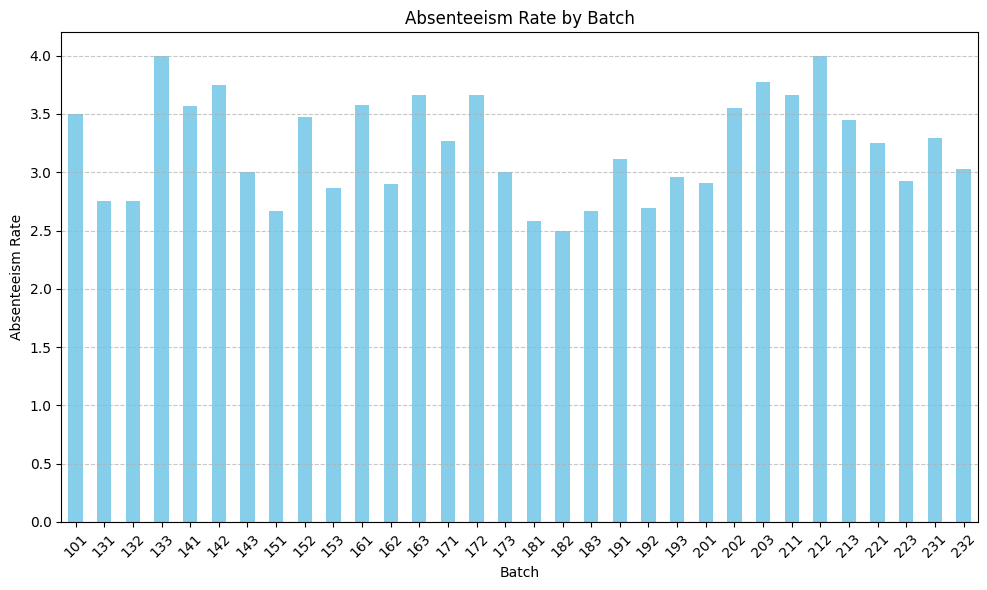

Number of Batches: 32


In [5]:
# Extract batch information from the ID column
df['Batch'] = df['ID'].astype(str).str[:3]

# Calculate absenteeism rate for each batch
absenteeism_rates = df.groupby('Batch')['APM'].mean().sort_index()

# Count the number of unique batches
num_batches = len(absenteeism_rates)

# Plot absenteeism rates
plt.figure(figsize=(10, 6))
absenteeism_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Batch')
plt.ylabel('Absenteeism Rate')
plt.title('Absenteeism Rate by Batch')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the number of batches
print("Number of Batches:", num_batches)

> This data shows us, absenteeism among the students do not depend on seniority since almost every batch have similar number of absence per week.

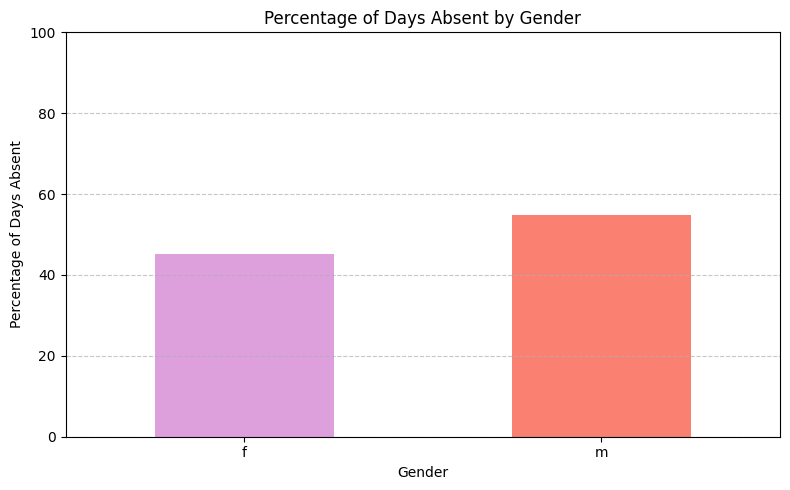

Percentage of Days Absent by Gender:
Gender
f    45.17882
m    54.82118
Name: APM, dtype: float64


In [6]:
# Calculate total days absent for each gender
total_days_absent_by_gender = df.groupby('Gender')['APM'].sum()

# Calculate total days absent across all genders
total_days_absent_all = total_days_absent_by_gender.sum()

# Calculate percentage of days absent for each gender
percentage_absent_by_gender = (total_days_absent_by_gender / total_days_absent_all) * 100

# Plot percentage of days absent by gender
plt.figure(figsize=(8, 5))
percentage_absent_by_gender.plot(kind='bar', color=['plum', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Percentage of Days Absent')
plt.title('Percentage of Days Absent by Gender')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limits to ensure the range is 0-100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the percentage of days absent by gender
print("Percentage of Days Absent by Gender:")
print(percentage_absent_by_gender)

> Here, we calculated the percentage of the days absent for each gender by dividing the total days absent for each gender by the total days absent across all gendersaccording to the table, it is also clear that gender do not play any big of a role for a student being absent.

C:\Users\aquat\AppData\Local\Temp\ipykernel_12304\3745921045.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


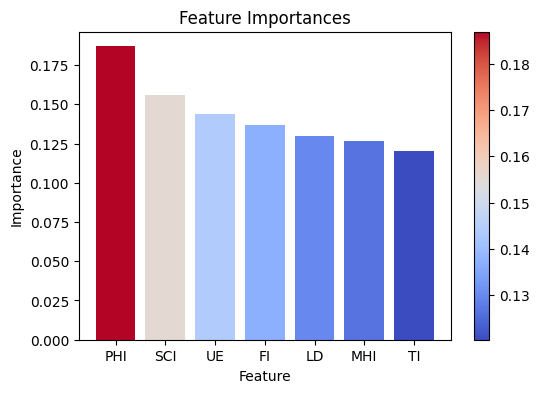

  Feature  Importance
0     PHI    0.186899
3     SCI    0.155625
5      UE    0.143785
1      FI    0.137116
2      LD    0.129876
4     MHI    0.126348
6      TI    0.120352


In [13]:
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('Dataset\encoded_dataset.csv')

# Define your features and target
X = df[['PHI', 'FI', 'LD', 'SCI', 'MHI', 'UE', 'TI']]
y = df['APM']

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Generate colors based on importance values
norm = plt.Normalize(importance_df['Importance'].min(), importance_df['Importance'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
colors = sm.to_rgba(importance_df['Importance'])

# Plot the feature importances with different colors
plt.figure(figsize=(6, 4))
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')

# Color bar
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('')

plt.show()

# Print the feature importances
print(importance_df)